In [2]:
import os
import copy
import numpy as np
import numpy.ma as ma
import collections
import pylab as pl
import time
import matplotlib.cm as cm
import rastercube.data as terradata
import rastercube.regions as regions
import rastercube.jgrid as jgrid
%matplotlib inline

In [3]:
dataroot = os.environ['TERRAI_DATA']
ndvi_header = jgrid.load('fs://' + dataroot + '/3_jgrids/worldgrid/modis/detsv2')

In [4]:
poly_latlng = regions.polygon_for_region('test_zones_1.h10v09_1')
#poly_latlng = regions.polygon_for_region('modis_tiles.h10v09')
print poly_latlng

[[ -5.79146244 -76.29526977]
 [ -5.68015058 -75.40856963]
 [ -6.47324757 -75.40098018]
 [ -6.48589665 -76.28388561]
 [ -5.79146244 -76.29526977]]


In [5]:
ndvi_ts = terradata.load_ndvi_timestamps()
print len(ndvi_ts)

371


In [6]:
import rastercube.jgrid.hdfgrid as hdfgrid
import rastercube.jgrid.jgrid3 as jgrid3
reload(jgrid3)
reload(terradata)
reload(hdfgrid)

header = hdfgrid.MODISHeader(timestamps=ndvi_ts[:5])
#header = hdfgrid.MODISHeader()
poly_xy = header.poly_latlng2xy(poly_latlng)

print poly_xy
#print np.max(poly_xy, axis=0) - np.min(poly_xy, axis=0)
xy_from, xy_to = np.min(poly_xy, axis=0), np.max(poly_xy, axis=0)
print header.fracs_for_rect_xy(xy_from, xy_to)
start = time.time()
ndvi_data, ndvi_mask = header.load_slice_xy(xy_from, xy_to)
print 'Took %f [s]' % (time.time() - start)

[(49965, 45979), (50381, 45926), (50438, 46307), (50018, 46313), (49965, 45979)]
[334]
Loading t : 0 1 2 3 4
Took 1.456020 [s]


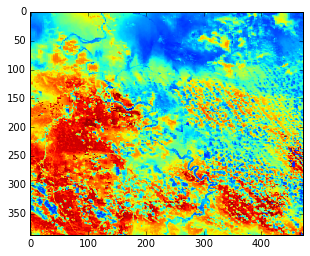

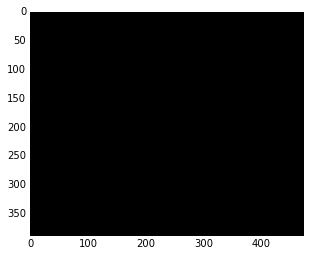

In [7]:
pl.figure()
pl.imshow(ndvi_data[:,:,0])

pl.figure()
pl.imshow(ndvi_mask, vmin=0, vmax=1, cmap=cm.binary)

In [8]:
frac_num = header.frac_num_from_hv(10, 9)
print frac_num
print header.tile_name(frac_num)

334
h10v09
